In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torchvision import transforms, datasets, models

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
from PIL import Image
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

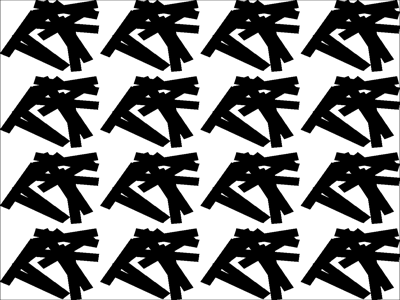

In [3]:
image_path = '/Users/karthik/GANS/Bio-Material-DATA/Pattern_FeatureIdx_1012_TopoUnit_4X4.png'

image = Image.open(image_path)

# Set the desired display width and height in pixels
display_width = 400
display_height = 300

# Display the image with the specified dimensions
display(image.resize((display_width, display_height)))

In [4]:
image.size

(1117, 1104)

In [5]:
image_folder_path = '/Users/karthik/GANS/Bio-Material-DATA/'

img_names = []

for folder, subfolders, filenames in os.walk(image_folder_path):
    for img in filenames:
        img_names.append(folder+ '//' +img)
        
print('Images: ',len(img_names))

Images:  2176


In [6]:
img_sizes = []

rejected = []

for item in img_names:
    try:
        with Image.open(item) as img:
            img_sizes.append(img.size)
        img.close()
            
    except:
        rejected.append(item) 

In [7]:
print(len(img_sizes))

2176


In [8]:
bio_material_info = pd.DataFrame(img_sizes, columns=["Width", "Height"])

In [9]:
bio_material_info

,Width,Height
0,774,758
1,369,378
2,388,377
3,980,1072
4,766,768
...,...,...
2171,752,781
2172,706,753
2173,1089,1086
2174,388,373


In [10]:
bio_material_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Width   2176 non-null   int64
 1   Height  2176 non-null   int64
dtypes: int64(2)
memory usage: 34.1 KB


In [11]:
bio_material_info.describe()

,Width,Height
count,2176.000000,2176.000000
mean,731.680607,732.386029
std,284.901276,284.900187
min,333.000000,336.000000
25%,387.000000,387.000000
50%,770.000000,771.000000
75%,1055.000000,1056.000000
max,1119.000000,1120.000000


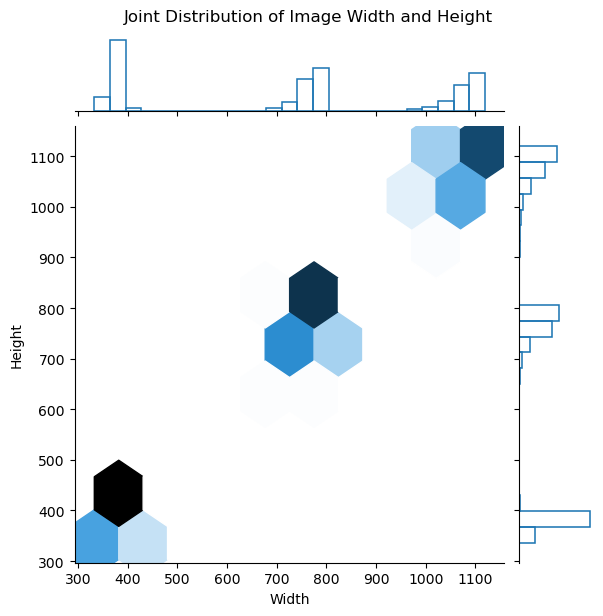

In [12]:
sns.jointplot(x=bio_material_info['Width'], y=bio_material_info['Height'], kind='hex', \
              marginal_kws=dict(bins=25, fill=False) )
plt.suptitle('Joint Distribution of Image Width and Height', y=1.02)
plt.show()

In [13]:
bio_material_info['Aspect Ratio'] = bio_material_info['Width'] / bio_material_info['Height']

sns.histplot(bio_material_info['Aspect Ratio'], kde=True)
plt.title('Histogram of Image Aspect Ratios')

In [14]:
import math

In [15]:
def compute_aspect_ratio(row):
    gcd_value = math.gcd(int(row['Width']), int(row['Height']))
    return f"{int(row['Width']) // gcd_value}:{int(row['Height']) // gcd_value}"

bio_material_info['Aspect Ratio'] = bio_material_info.apply(compute_aspect_ratio, axis=1)

print(bio_material_info)

      Width  Height Aspect Ratio
0       774     758      387:379
1       369     378        41:42
2       388     377      388:377
3       980    1072      245:268
4       766     768      383:384
...     ...     ...          ...
2171    752     781      752:781
2172    706     753      706:753
2173   1089    1086      363:362
2174    388     373      388:373
2175    734     780      367:390

[2176 rows x 3 columns]


In [16]:
len(bio_material_info['Height'].unique())

293

In [17]:
len(bio_material_info['Width'].unique())

296

**IMAGE PREPROCESSING**

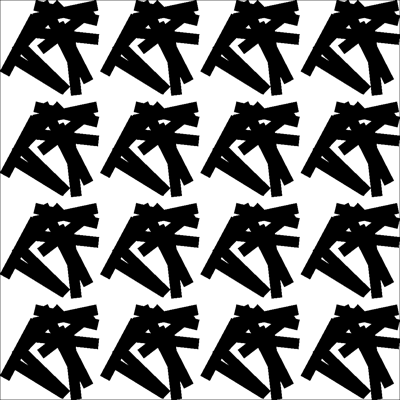

In [5]:
display_width = 400
display_height = 400

# Display the image with the specified dimensions
display(image.resize((display_width, display_height)))

Image Path = '/Users/karthik/GANS/Bio-Material-DATA/Pattern_FeatureIdx_1012_TopoUnit_4X4.png'

In [6]:
import cv2

In [7]:
image_path = '/Users/karthik/GANS/Bio-Material-DATA/Pattern_FeatureIdx_1012_TopoUnit_4X4.png'

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [8]:
kernel = np.ones((7,7), np.uint8)

In [9]:
# Erosion
erosion = cv2.erode(img, kernel, iterations=1)

In [10]:
erosion

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

**Transforming an images into gradient**

In [11]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

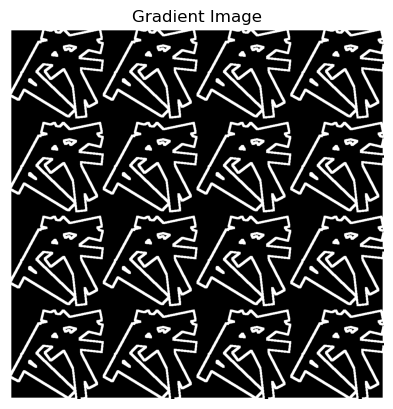

In [12]:
plt.imshow(gradient, cmap='gray')
plt.title('Gradient Image')
plt.axis('off')  # Hide axes for better visualization
plt.show()

In [13]:
output_filename = "/Users/karthik/GANS/gradient_image.png"
cv2.imwrite(output_filename, gradient)

True

In [17]:
import glob

**Transforming all images into gradient**

In [14]:
input_path_g = '/Users/karthik/GANS/Bio-Material-DATA/'
output_path_g = '/Users/karthik/GANS/Gradient_k7/'

In [15]:
# Ensure the output directory exists or create it
if not os.path.exists(output_path_g):
    os.makedirs(output_path_g)

In [18]:
# Iterate over all the image files in the input directory
for image_file in glob.glob(os.path.join(input_path_g, '*.png')): 
    
    # Assuming PNG format, adjust accordingly if different
    # Read the image
    
    img = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)  
    
    # Apply the gradient operation
    gradient_img = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
    
    # Construct the output file path and save the image
    base_name = os.path.basename(image_file)
    output_file_path = os.path.join(output_path_g, base_name)
    cv2.imwrite(output_file_path, gradient_img)

print("Gradient operation applied and images saved!")

Gradient operation applied and images saved!


**Resizing the gradient Image** 

In [19]:
image_path_g = "/Users/karthik/GANS/Gradient_k7/Pattern_FeatureIdx_1001_TopoUnit_4X4.png"

In [20]:
img_g = cv2.imread(image_path_g, cv2.IMREAD_GRAYSCALE)

In [21]:
# Resize the image to 224x224
resized_img_g = cv2.resize(img_g, (224, 224), interpolation=cv2.INTER_AREA)

In [22]:
# If you want to save the resized image
cv2.imwrite('resized_image_g.png', resized_img_g)

True

**Resizing all the gradient Image**

In [23]:
input_path_gr = '/Users/karthik/GANS/Gradient_k7/'
output_path_gr = '/Users/karthik/GANS/Rezied_GRADIENT_k7/'

In [24]:
if not os.path.exists(output_path_gr):
    os.makedirs(output_path_gr)

In [ ]:
# Iterate over all the image files in the input directory
for image_file in glob.glob(os.path.join(input_path_gr, '*.png')):
    # Assuming PNG format, change accordingly if different
    # Read the image
    img = cv2.imread(image_file)
    
    # Resize the image
    resized_img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
    
    # Construct the output file path and save the image
    base_name = os.path.basename(image_file)
    output_file_path = os.path.join(output_path_gr, base_name)
    cv2.imwrite(output_file_path, resized_img)

print("Resizing complete!")

**Cropping all the gradient image**

In [62]:
input_path_gc = '/Users/karthik/GANS/gradient_applied-Bio-Material-DATA/'
output_path_gc = '/Users/karthik/GANS/Cropped-Gradient_Bio-Material-DATA/'

In [65]:
if not os.path.exists(output_path_gc):
    os.makedirs(output_path_gc)

In [66]:
# Get all the PNG files from the input path
image_files = glob.glob(input_path_gc + '*.png')

for image_file in image_files:
    # Read the image
    img = cv2.imread(image_file, cv2.IMREAD_UNCHANGED)
    
    # Calculate the dimensions of a single pattern
    pattern_width = img.shape[1] // 4
    pattern_height = img.shape[0] // 4
    
    # Crop the top-left pattern
    cropped_img = img[0:pattern_height, 0:pattern_width]
    
    # Save the cropped image to the output directory
    output_file = os.path.join(output_path_gc, os.path.basename(image_file))
    cv2.imwrite(output_file, cropped_img)

**Resizing a single actual image**

In [28]:
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [29]:
# Resize the image to 224x224
resized_img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)

In [30]:
# If you want to save the resized image
cv2.imwrite('resized_image_path.png', resized_img)

True

**Resizing all the actual image**

In [50]:
input_path_a = '/Users/karthik/GANS/Bio-Material-DATA/'
output_path_a = '/Users/karthik/GANS/Rezied-224X224-Bio-Material-DATA/'

In [51]:
if not os.path.exists(output_path_a):
    os.makedirs(output_path_a)

In [52]:
# Iterate over all the image files in the input directory
for image_file in glob.glob(os.path.join(input_path_a, '*.png')):
    # Assuming PNG format, change accordingly if different
    # Read the image
    img = cv2.imread(image_file)
    
    # Resize the image
    resized_img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
    
    # Construct the output file path and save the image
    base_name = os.path.basename(image_file)
    output_file_path = os.path.join(output_path_a, base_name)
    cv2.imwrite(output_file_path, resized_img)

print("Resizing complete!")

Resizing complete!


**Calculation and Cropping a single Image**

In [33]:
img = cv2.imread(image_path)

In [34]:
# Calculate the dimensions of a single pattern (assuming a 4x4 repetition)
pattern_width = img.shape[1] // 4
pattern_height = img.shape[0] // 4

In [35]:
# Crop the top-left pattern
cropped_img = img[0:pattern_height, 0:pattern_width]

In [36]:
cv2.imwrite('cropped_image.png', cropped_img)

True

**Cropping all the images**

Defining the path

In [41]:
input_path = '/Users/karthik/GANS/Bio-Material-DATA/'
output_path = '/Users/karthik/GANS/Cropped-Bio-Material-DATA/'

Creating Output Directory if doesn't exist

In [42]:
if not os.path.exists(output_path):
    os.makedirs(output_path)

Cropping Image

In [43]:
# Get all the PNG files from the input path
image_files = glob.glob(input_path + '*.png')

for image_file in image_files:
    # Read the image
    img = cv2.imread(image_file, cv2.IMREAD_UNCHANGED)
    
    # Calculate the dimensions of a single pattern
    pattern_width = img.shape[1] // 4
    pattern_height = img.shape[0] // 4
    
    # Crop the top-left pattern
    cropped_img = img[0:pattern_height, 0:pattern_width]
    
    # Save the cropped image to the output directory
    output_file = os.path.join(output_path, os.path.basename(image_file))
    cv2.imwrite(output_file, cropped_img)


**ANALYSING THE DATA**

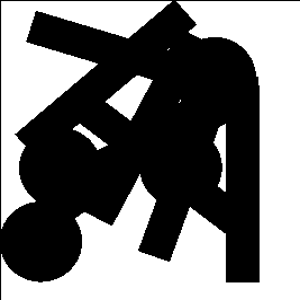

In [69]:
re_image_path = '/Users/karthik/GANS/Cropped-Bio_Materials/Cropped-Bio-Material-DATA/Pattern_FeatureIdx_1021_TopoUnit_4X4.png'

image = Image.open(re_image_path)

# Set the desired display width and height in pixels
display_width = 300
display_height = 300

# Display the image with the specified dimensions
display(image.resize((display_width, display_height)))

In [70]:
image_folder_path = '/Users/karthik/GANS/Cropped-Bio_Materials/Cropped-Bio-Material-DATA/'

re_img_names = []

for folder, subfolders, filenames in os.walk(image_folder_path):
    for img in filenames:
        re_img_names.append(folder+ '//' +img)
        
print('Images: ',len(re_img_names))

Images:  2176


In [71]:
re_img_sizes = []

rejected = []

for item in re_img_names:
    try:
        with Image.open(item) as img:
            re_img_sizes.append(img.size)
        img.close()
            
    except:
        rejected.append(item) 

In [72]:
re_bio_material_info = pd.DataFrame(re_img_sizes, columns=["Width", "Height"])

In [73]:
re_bio_material_info.head()

,Width,Height
0,193,189
1,92,94
2,97,94
3,245,268
4,191,192


In [75]:
re_bio_material_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Width   2176 non-null   int64
 1   Height  2176 non-null   int64
dtypes: int64(2)
memory usage: 34.1 KB


In [76]:
re_bio_material_info.describe()

,Width,Height
count,2176.000000,2176.000000
mean,182.545496,182.727482
std,71.226017,71.226281
min,83.000000,84.000000
25%,96.000000,96.000000
50%,192.000000,192.000000
75%,263.000000,264.000000
max,279.000000,280.000000


In [77]:
re_bio_material_info['Width'].unique()

array([193,  92,  97, 245, 191, 197, 185,  96, 256, 188, 275, 270, 277,
       172, 195, 189, 278, 198, 276, 252, 251, 274,  98,  89,  93,  95,
        90, 181, 273, 246, 190, 255, 196,  94, 269, 194, 279, 249, 183,
        91, 271,  88,  87, 272, 199, 187,  86, 175, 257, 186, 177, 265,
       268, 235, 176, 260, 266,  99, 267, 180, 184, 192, 264, 182, 168,
       173, 259, 261, 263, 170, 247, 242, 262, 178, 250, 174, 179, 253,
       254, 258, 228, 200, 241,  85, 240,  83, 236, 244, 243, 171])

In [79]:
re_bio_material_info['Height'].unique()

array([189,  94, 268, 192, 196, 194,  95, 273, 182, 198, 195, 275, 264,
       278, 169, 187, 276, 269, 272, 261, 279,  99,  90,  96, 186,  97,
       277,  88,  89, 197, 248,  93,  98,  91, 184, 270, 274, 266, 185,
       271, 260, 191,  92, 179, 188, 245, 262, 199, 265, 255, 173,  84,
       193, 263, 190, 254,  87, 252, 183, 267, 256, 257,  85, 247, 175,
       258, 162, 259, 240, 249, 181, 177, 253, 178, 180, 160, 176, 174,
       251, 235, 165, 168, 100, 170,  86, 280, 172, 244, 171, 200, 237,
       230, 246, 243])

**Separating the images according to the pixel size**

In [85]:
# Path where the images are stored
image_folder_path = '/Users/karthik/GANS/Cropped-Bio_Materials/Cropped-Bio-Material-DATA/'

# Create two folders if they don't exist
below_130_path = os.path.join(image_folder_path, 'Below_130')
above_or_equal_130_path = os.path.join(image_folder_path, 'Above_or_Equal_130')

if not os.path.exists(below_130_path):
    os.makedirs(below_130_path)

if not os.path.exists(above_or_equal_130_path):
    os.makedirs(above_or_equal_130_path)

# Go through each image in the folder
for img_file in os.listdir(image_folder_path):
    file_path = os.path.join(image_folder_path, img_file)

    # Check if the path points to a file (and not a directory)
    if os.path.isfile(file_path):

        # Read the image
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE) # Assuming grayscale images for simplicity
        
        # Check if image loading was successful
        if img is not None:
            avg_pixel_value = np.mean(img)

            # Move the file based on the average pixel value
            if avg_pixel_value < 130:
                os.rename(file_path, os.path.join(below_130_path, img_file))
            else:
                os.rename(file_path, os.path.join(above_or_equal_130_path, img_file))

print("Images have been sorted.")


Images have been sorted.


In [ ]:
image_folder_path_g2 = '/Users/karthik/GANS/Bio-Material-DATA/'

**Processing the image for avoiding overlapping and applying gradient**

In [88]:

def enlarge_image(img, factor=2):

    return np.tile(img, (factor, factor))

def crop_center(img, target_height, target_width):

    y, x = img.shape
    start_x = x//2 - target_width//2
    start_y = y//2 - target_height//2
    return img[start_y:start_y+target_height, start_x:start_x+target_width]

image_folder_path_g2 = '/Users/karthik/GANS/Bio-Material-DATA/'
kernel = np.ones((3, 3), np.uint8)  # Example kernel. You can adjust its size and shape.

# Create the output folder if it doesn't exist
output_folder = os.path.join(image_folder_path_g2, "gradient_images2")
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for image_name in os.listdir(image_folder_path_g2):
    image_path = os.path.join(image_folder_path_g2, image_name)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale

    # Check if the file is an image
    if img is None:
        continue

    # 1. Enlarge
    enlarged_img = enlarge_image(img)

    # 2. Compute the Gradient on enlarged image
    gradient_img_large = cv2.morphologyEx(enlarged_img, cv2.MORPH_GRADIENT, kernel)

    # 3. Crop back to the original size
    gradient_img = crop_center(gradient_img_large, img.shape[0], img.shape[1])

    # 4. Save
    output_path = os.path.join(output_folder, "gradient_" + image_name)
    cv2.imwrite(output_path, gradient_img)


**Cropped gradient image without overlapping**

In [89]:
input_path = '/Users/karthik/GANS/Bio-Material-DATA/gradient_images2/'
output_path = '/Users/karthik/GANS/Cropped-Gradient_Final_Bio-Material-DATA/'

In [90]:
if not os.path.exists(output_path):
    os.makedirs(output_path)

In [91]:
# Get all the PNG files from the input path
image_files = glob.glob(input_path + '*.png')

for image_file in image_files:
    # Read the image
    img = cv2.imread(image_file, cv2.IMREAD_UNCHANGED)
    
    # Calculate the dimensions of a single pattern
    pattern_width = img.shape[1] // 4
    pattern_height = img.shape[0] // 4
    
    # Crop the top-left pattern
    cropped_img = img[0:pattern_height, 0:pattern_width]
    
    # Save the cropped image to the output directory
    output_file = os.path.join(output_path, os.path.basename(image_file))
    cv2.imwrite(output_file, cropped_img)


**Processing image to avoid overlapping with the actual bio data**

In [93]:
image_folder_path_g2 = '/Users/karthik/GANS/Bio-Material-DATA/'

# Create the output folder if it doesn't exist
output_folder = os.path.join(image_folder_path_g2, "processed_images")
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for image_name in os.listdir(image_folder_path_g2):
    image_path = os.path.join(image_folder_path_g2, image_name)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale

    # Check if the file is an image
    if img is None:
        continue

    # 1. Enlarge
    enlarged_img = enlarge_image(img)

    # 2. Crop back to the original size
    processed_img = crop_center(enlarged_img, img.shape[0], img.shape[1])

    # 3. Save
    output_path = os.path.join(output_folder, "processed_" + image_name)
    cv2.imwrite(output_path, processed_img)


**Cropping the images without overlapping**

In [96]:
input_path = '/Users/karthik/GANS/Bio-Material-DATA/processed_images/'
output_path = '/Users/karthik/GANS/Bio-Material-DATA/Cropped_images_without_overlapping/'

In [97]:
if not os.path.exists(output_path):
    os.makedirs(output_path)

In [98]:
image_files = glob.glob(input_path + '*.png')

for image_file in image_files:
    # Read the image
    img = cv2.imread(image_file, cv2.IMREAD_UNCHANGED)
    
    # Calculate the dimensions of a single pattern
    pattern_width = img.shape[1] // 4
    pattern_height = img.shape[0] // 4
    
    # Crop the top-left pattern
    cropped_img = img[0:pattern_height, 0:pattern_width]
    
    # Save the cropped image to the output directory
    output_file = os.path.join(output_path, os.path.basename(image_file))
    cv2.imwrite(output_file, cropped_img)


**Segregrating without overlapping images into pixel size**

In [102]:
if not os.path.exists(below_130_path):
    os.makedirs(below_130_path)

if not os.path.exists(above_or_equal_130_path):
    os.makedirs(above_or_equal_130_path)

# Go through each image in the folder
for img_file in os.listdir(image_folder_path):
    file_path = os.path.join(image_folder_path, img_file)

    # Check if the path points to a file (and not a directory)
    if os.path.isfile(file_path):

        # Read the image
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE) # Assuming grayscale images for simplicity
        
        # Check if image loading was successful
        if img is not None:
            avg_pixel_value = np.mean(img)

            # Move the file based on the average pixel value
            if avg_pixel_value < 130:
                os.rename(file_path, os.path.join(below_130_path, img_file))
            else:
                os.rename(file_path, os.path.join(above_or_equal_130_path, img_file))

print("Images have been sorted.")

Images have been sorted.


In [4]:
import glob

**Resizing the cropped topo images which are above 200 pixels**

In [7]:
input_path_a = '/Users/karthik/GANS/Bio_Material_DATA/1by4/above_200/'
output_path_a = '/Users/karthik/GANS/Bio_Material_DATA/1by4/resized_images_above_200/'

if not os.path.exists(output_path_a):
    os.makedirs(output_path_a)
    
for image_file in glob.glob(os.path.join(input_path_a, '*.png')):
    # Assuming PNG format, change accordingly if different
    # Read the image
    img = cv2.imread(image_file)
    
    # Resize the image
    resized_img = cv2.resize(img, (192, 192), interpolation=cv2.INTER_AREA)
    
    # Construct the output file path and save the image
    base_name = os.path.basename(image_file)
    output_file_path = os.path.join(output_path_a, base_name)
    cv2.imwrite(output_file_path, resized_img)

print("Resizing complete!")

Resizing complete!
